<a href="https://colab.research.google.com/github/raregem-AI/Pridicting-Solar-Power-with-Machine-Learning/blob/main/Wind_Turbine_Energy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Objective**:In this project, we are going to be creating several machine learning models for the predictions of energy generated by a wind turbine  system, given the weather conditions an hour prior

(TARGET COLUMN is System power generated)
metrics:mean squared error and mean absolute error

**WORKFLOW**:In order to accomplish the above goal, we need to perform the folllowing

1. Data Loading and Understanding
2. Cleaning the Data
3. Feature Engineering
4. Exploratory Data Analysis
5. Modellling
6. Hyperparameter Tuning
7. Model Selection
8. Inference Script Creation

**Data Loading**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Read in data
data = pd.read_csv("/content/drive/MyDrive/Data/TexasTurbine.csv")

In [ ]:
#First five rows
data.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [ ]:
#Columns
data.columns

Index(['Time stamp', 'System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)'],
      dtype='object')

In [ ]:
#Getting the data dimension
data.shape

(8760, 6)

### Cleaning the data

In [ ]:
data.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,"Jan 1, 12:00 am",1766.64,9.926,128,1.000480,18.263
1,"Jan 1, 01:00 am",1433.83,9.273,135,0.999790,18.363
2,"Jan 1, 02:00 am",1167.23,8.660,142,0.999592,18.663
3,"Jan 1, 03:00 am",1524.59,9.461,148,0.998309,18.763
4,"Jan 1, 04:00 am",1384.28,9.184,150,0.998507,18.963


In [ ]:
#Check for missing data
#Fix the timestamp
#set the timestamp as index
#check for duplicates

In [ ]:
#check for missing values
data.isna().sum()


Time stamp                       0
System power generated | (kW)    0
Wind speed | (m/s)               0
Wind direction | (deg)           0
Pressure | (atm)                 0
Air temperature | ('C)           0
dtype: int64

In [ ]:
data['Time stamp'] = pd.to_datetime(data['Time stamp'], format='%b %d, %I:%M %p').dt.strftime('%Y-%m-%d %H:%M:%S')
data['Time stamp'] = data['Time stamp'].str.replace('1900','2021')

#Convert
data['Time stamp'] = pd.to_datetime(data['Time stamp'])



In [ ]:
data.head()

,Time stamp,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
0,2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263
1,2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363
2,2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663
3,2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763
4,2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963


In [ ]:
data.index = data['Time stamp']
data.drop('Time stamp',axis=1, inplace =True)

In [ ]:
data.head()

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C)
Time stamp,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963


In [ ]:
#checking for duplicate
data.duplicated().sum()

0

# Feature Engineering

In [ ]:
# Extract the following infomation** from data index: day of week, week,month,quarter

In [ ]:
def extract_features(dataframe):
  """
  this function extracts data features from the index and also create a season column
  """
  #copy the dataframe
  dataframe = dataframe.copy()
  dataframe['quarter'] = dataframe.index.quarter
  dataframe['month'] = dataframe.index.month
  dataframe['week'] = dataframe.index.isocalendar().week.astype(int)
  dataframe['hour'] = dataframe.index.hour
  return dataframe

def map_month_to_season(month):
  if 3 <= month <= 5:
    return 'spring'
  elif 6 <= month <= 8:
    return 'summer'
  elif 9 <= month <= 11:
    return 'fall'
  else:
    return 'winter'




In [ ]:
data = extract_features(data)

In [ ]:
data['season']= data['month'].apply(map_month_to_season)

In [ ]:
data

,System power generated | (kW),Wind speed | (m/s),Wind direction | (deg),Pressure | (atm),Air temperature | ('C),quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19,winter
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20,winter
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21,winter


In [ ]:
#View my data types
data.dtypes

System power generated | (kW)    float64
Wind speed | (m/s)               float64
Wind direction | (deg)             int64
Pressure | (atm)                 float64
Air temperature | ('C)           float64
quarter                            int32
month                              int32
week                               int64
hour                               int32
season                            object
dtype: object

In [ ]:
data.columns

Index(['System power generated | (kW)', 'Wind speed | (m/s)',
       'Wind direction | (deg)', 'Pressure | (atm)', 'Air temperature | ('C)',
       'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

In [ ]:
data.columns=['power_generated', 'wind_speed',
       'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season']

In [ ]:
data.head()

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,winter
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,winter
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,winter
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,winter
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,winter


# Exploratory Data Analysis

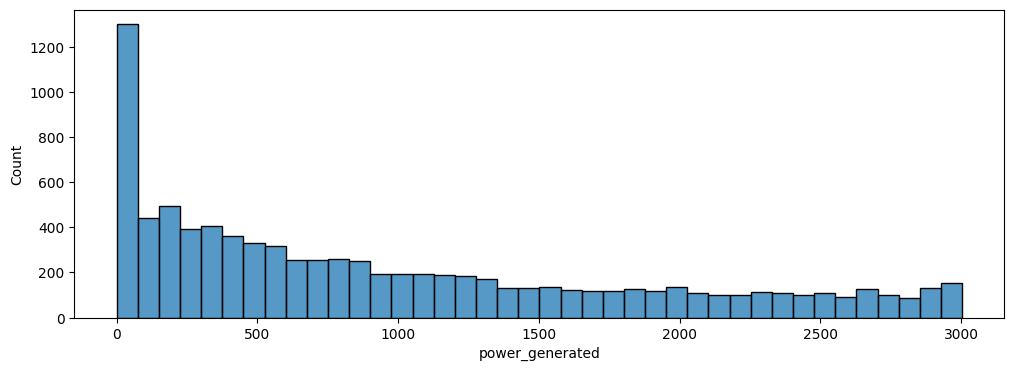

In [ ]:
#univariate: power_generated,wind speed, direction, temperature, pressure and season
#splecify the plot size
plt.figure(figsize = (12,4))
#create the histogram
sns.histplot(data['power_generated'], bins=40)
plt.show()

In [ ]:
data.power_generated.mean()

964.4679340166095

In [ ]:
data.power_generated.describe()

count    8760.000000
mean      964.467934
std       878.558112
min         0.000000
25%       215.951500
50%       693.968500
75%      1562.287500
max      3004.010000
Name: power_generated, dtype: float64

In [ ]:
#selecting out non power generated rows
data[data['power_generated'] <= 0]

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season
Time stamp,,,,,,,,,,
2021-01-05 00:00:00,0.0,2.491,156,0.991694,20.263,1,1,1,0,winter
2021-01-05 01:00:00,0.0,0.484,95,0.994162,19.963,1,1,1,1,winter
2021-01-07 22:00:00,0.0,2.788,340,1.002560,10.863,1,1,1,22,winter
2021-01-07 23:00:00,0.0,2.116,273,1.001870,11.963,1,1,1,23,winter
2021-01-08 00:00:00,0.0,2.897,284,1.000980,12.063,1,1,1,0,winter
...,...,...,...,...,...,...,...,...,...,...
2021-12-27 23:00:00,0.0,2.748,241,0.997129,13.863,4,12,52,23,winter
2021-12-28 00:00:00,0.0,2.135,271,0.996338,14.163,4,12,52,0,winter
2021-12-28 01:00:00,0.0,2.076,246,0.996338,14.163,4,12,52,1,winter


### Insights:
- In 822 instances, we get power generated to be 0

In [ ]:
# Getting counts of season where power generation is 0
data[data['power_generated'] <= 0]['season'].value_counts()

season
fall      284
winter    239
summer    191
spring    108
Name: count, dtype: int64

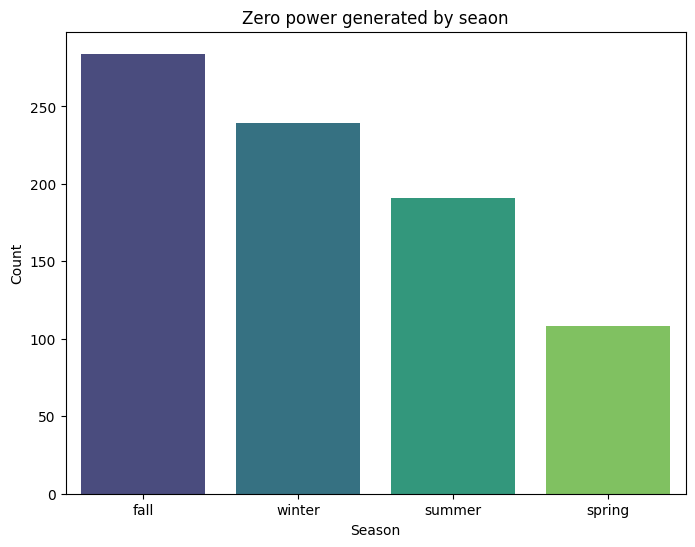

In [ ]:
#barplot
seasson_counts = data[data['power_generated'] <= 0]['season'].value_counts()
plt.figure(figsize = (8,6))
sns.barplot(x=seasson_counts.index, y=seasson_counts.values,palette='viridis')
plt.title('Zero power generated by seaon')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

<Axes: ylabel='power_generated'>

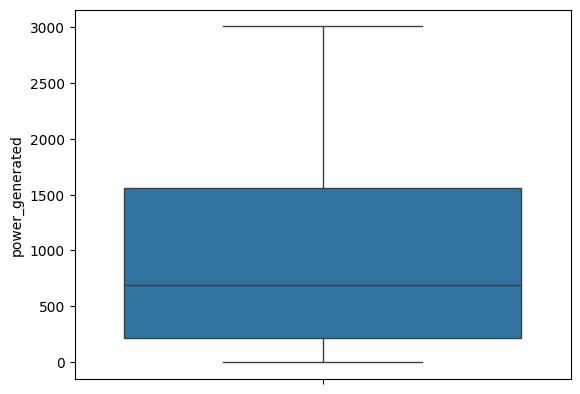

In [ ]:
# power generated outliers
sns.boxplot(data['power_generated'])

#### Insights:
- There is an absence of outliers in the poer generated column

In [ ]:
data.columns

Index(['power_generated', 'wind_speed', 'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season'],
      dtype='object')

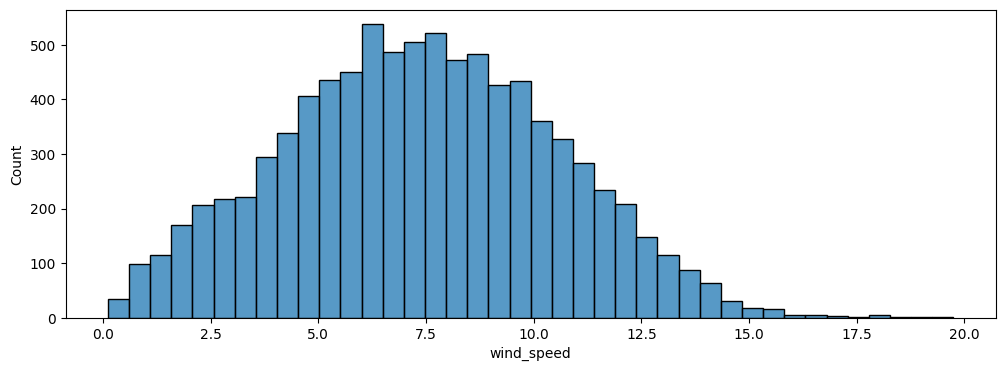

In [ ]:
# Checking distibution of wind speed
plt.figure(figsize = (12,4))
sns.histplot(data['wind_speed'], bins=40)
plt.show()

#### Insights:
- Wind speed is normally distributed

<Axes: ylabel='wind_dir'>

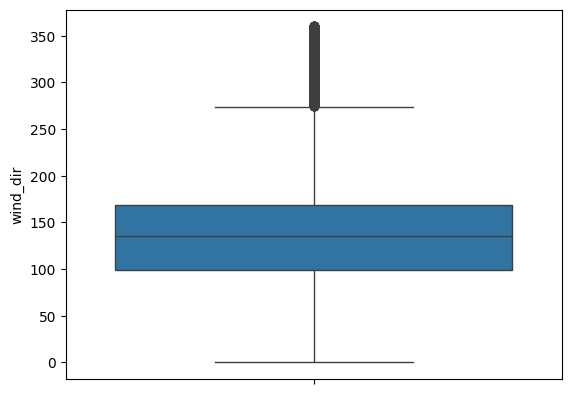

In [ ]:
sns.boxplot(data['wind_dir'])

### Insight:
- Seveirity is not too large

<Axes: xlabel='wind_dir', ylabel='Count'>

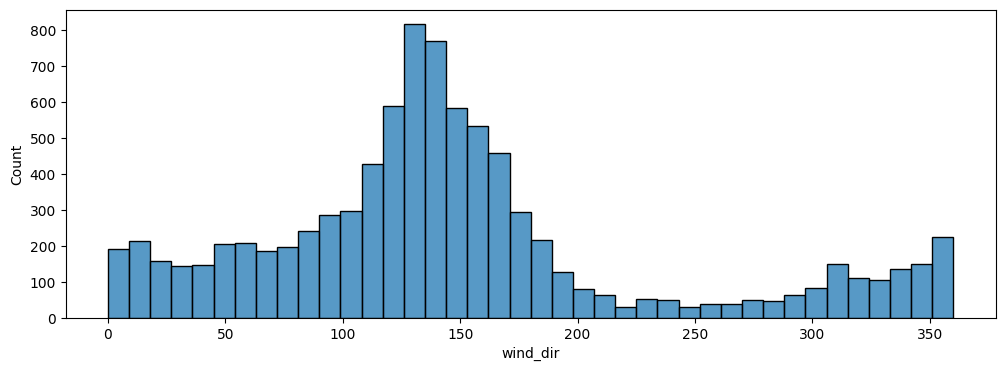

In [ ]:
plt.figure(figsize = (12,4))
sns.histplot(data['wind_dir'],bins=40)

### Distribution of wind dir(inangles)  is not strictly normal

<Axes: xlabel='pressure', ylabel='Count'>

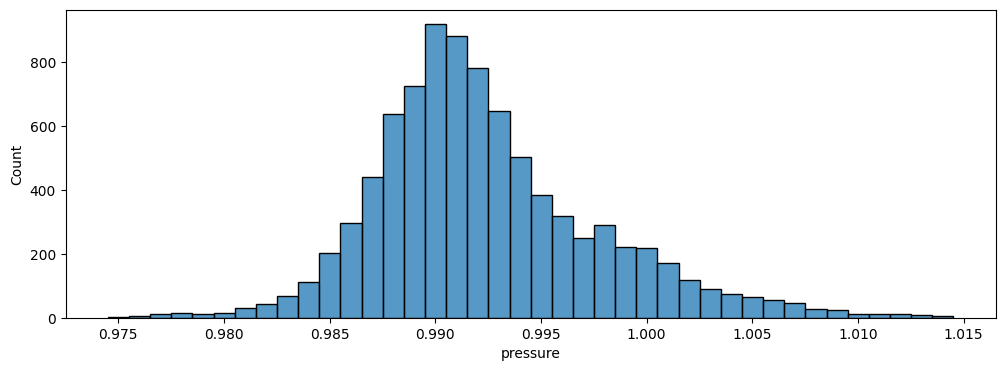

In [ ]:
#showing the distribution 0f pressure
plt.figure(figsize = (12,4))
sns.histplot(data['pressure'],bins=40)

<Axes: xlabel='temperature', ylabel='Count'>

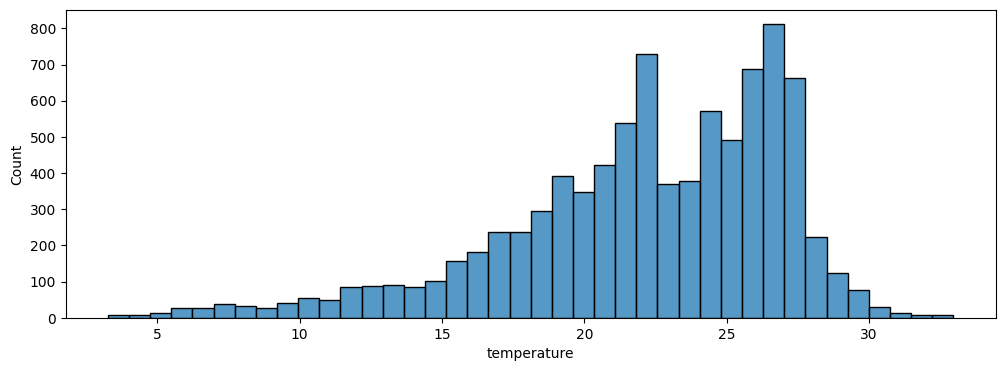

In [ ]:
##showing the distrinution of temperature
plt.figure(figsize = (12,4))
sns.histplot(data['temperature'],bins=40)

### Inssighs:
- Temperature is skweed to the right probbaly due to the fact that the warm days are more than cold days

### Multivariate analysis

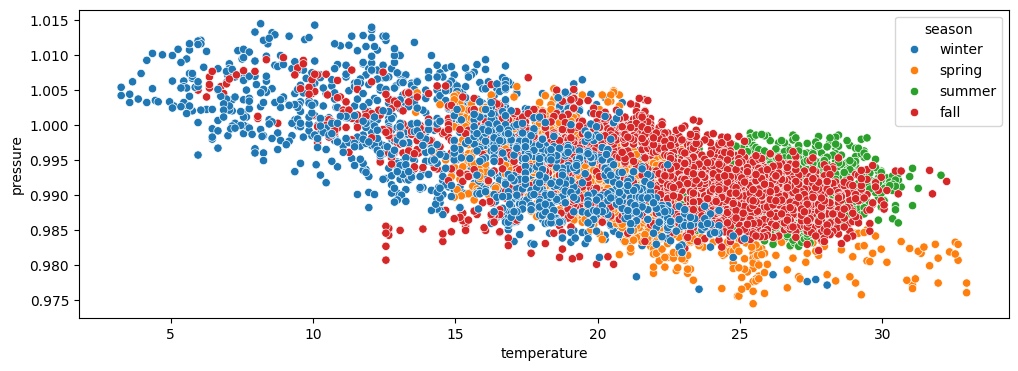

In [ ]:
#Multivariate
#tem vs pres
plt.figure(figsize = (12,4))
sns.scatterplot(data=data,x=data['temperature'], y=data['pressure'],hue='season')
plt.show()

### Insight:

- Winter: colder days(lower temp, less than 20)
- Spring: high temperature at low pressure, and low temperature at high pressure
- Summer: high temperature
- Fall : widest range of temperature and pressure

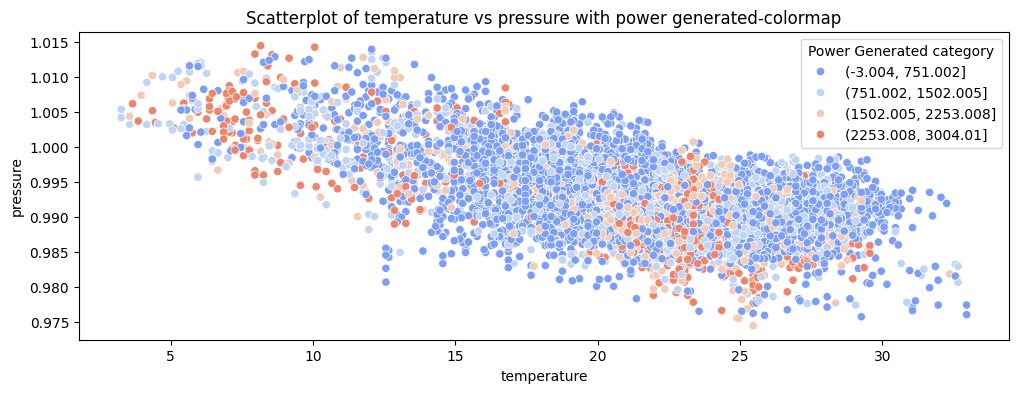

In [ ]:
#create bins of power generated values
num_bins =4
binned_data = pd.cut(data['power_generated'], bins=num_bins)

#creating figure and specifying size
plt.figure(figsize = (12,4))
# Removed cmap argument as it is not applicable to scatterplot, use palette instead.
sns.scatterplot(data=data, x='temperature', y='pressure',hue=binned_data, palette='coolwarm')

#addingtitle,legend, xlabel,ylabe
plt.title('Scatterplot of temperature vs pressure with power generated-colormap')
plt.xlabel('temperature')
plt.ylabel('pressure')
plt.legend(title='Power Generated category',loc="upper right")
plt.show()

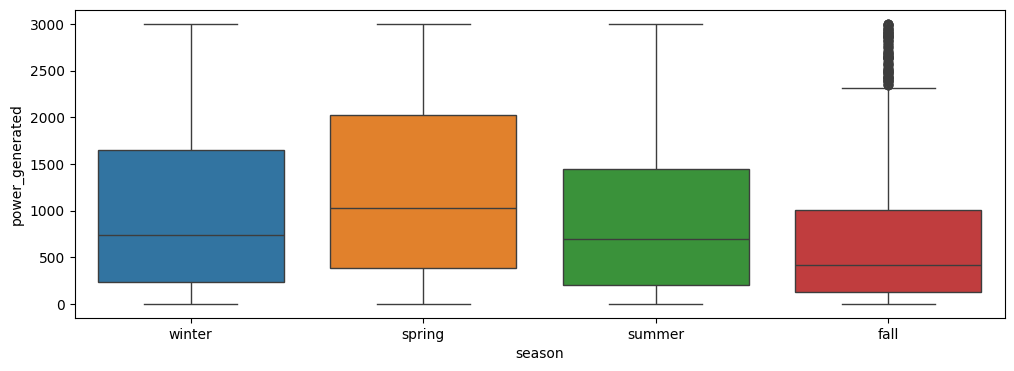

In [ ]:
#Observe the effect of season on power generated
plt.figure(figsize = (12,4))
sns.boxplot(data=data, y='power_generated', x='season',hue='season')
plt.show()

### Insight:
- Spring is the most productive season for power generation and fall falls behind

#wind charateristics

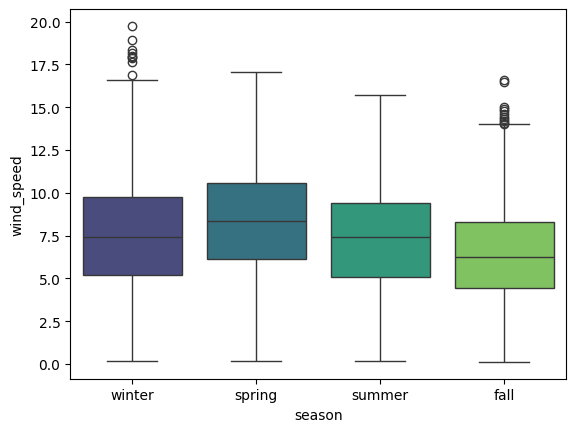

In [ ]:
#wind speed and powergenerated
sns.boxplot(data=data, y='wind_speed', x='season',palette=('viridis'))
plt.show()

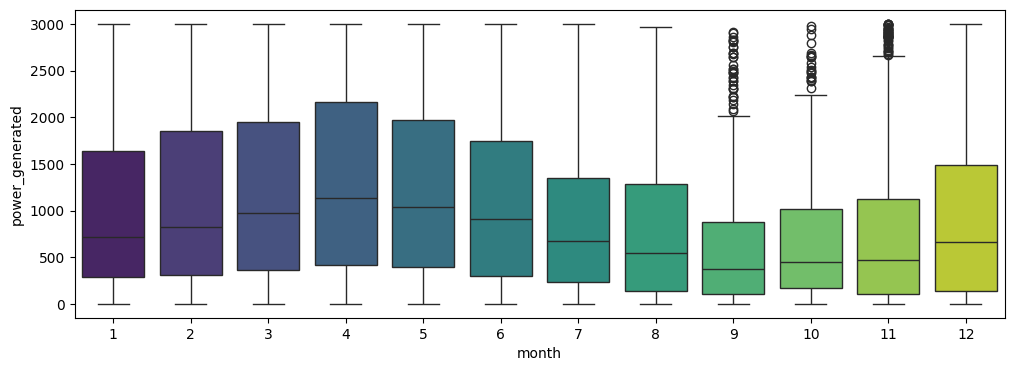

In [ ]:
#month on power generated
plt.figure(figsize = (12,4))
sns.boxplot(data=data, y='power_generated', x='month',palette=('viridis'))
plt.show()

### Insights:
- Cyclical patter emerges when you compare power generated vs month

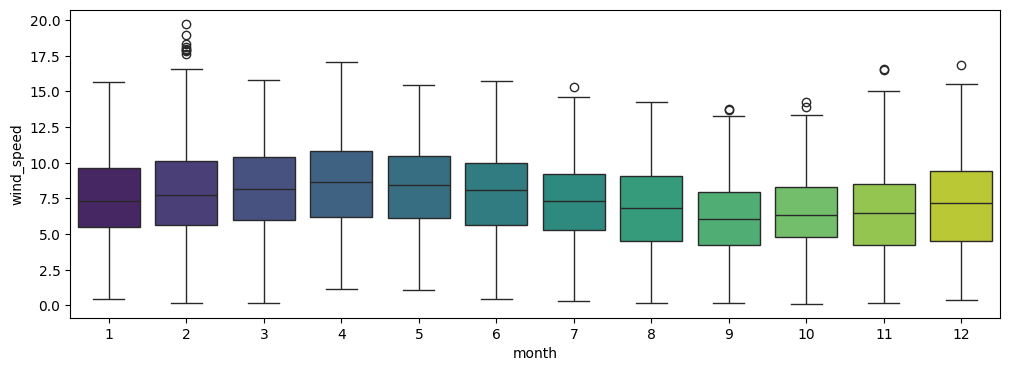

In [ ]:
#Observe wind speed and month
plt.figure(figsize = (12,4))
sns.boxplot(data=data, y='wind_speed', x='month',palette=('viridis'))
plt.show()

### Insight:
- Pattern same for wind vs month

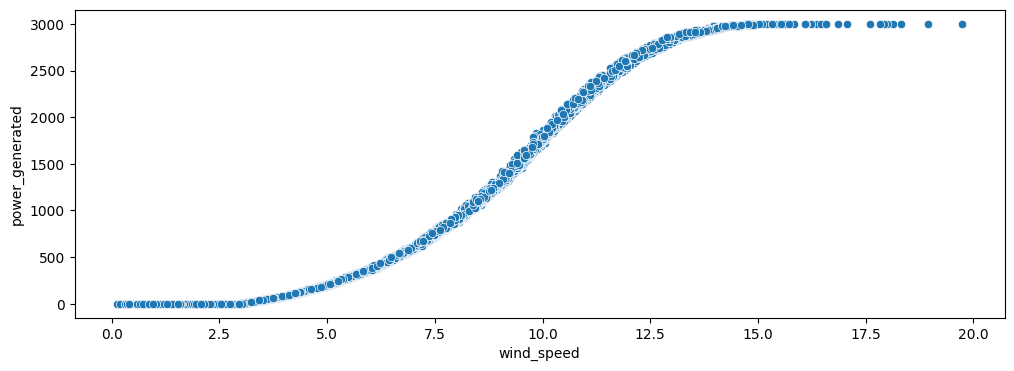

In [ ]:
#Observe the effect of wind speed on power generated
plt.figure(figsize = (12,4))
sns.scatterplot(data=data, x='wind_speed', y='power_generated')
plt.show()

### Insights:
- Power generated curve
- wind speed less than 2.5 does not lead to power generation
- Increasing wind speed from 15 and above leads to steady power generation of 3kw.
- Suggestion of  the optimum capacity of the wind turnbine
in comparison with the original capacity(Wind turnbine depressiating or not)

In [ ]:
data['wind_dir']
bin_labels =['N','NE','E','SE','S','SW','W','NW']
bin_edge =[-1, 45, 90, 135, 180, 225, 270, 315, 360]
binned_data =  pd.cut(data['wind_dir'], bins=bin_edge, labels=bin_labels)


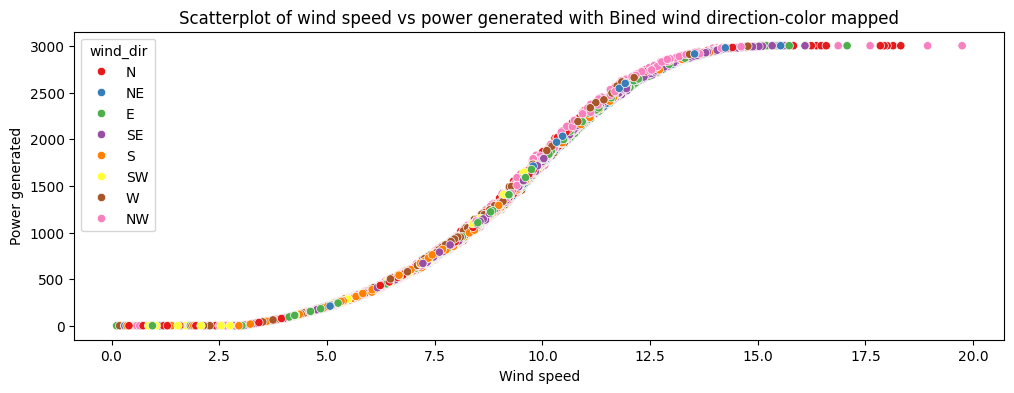

In [ ]:
plt.figure(figsize = (12,4))
sns.scatterplot(data=data, y='power_generated', x='wind_speed',hue =binned_data,palette=('Set1'))
plt.title('Scatterplot of wind speed vs power generated with Bined wind direction-color mapped')
plt.xlabel('Wind speed')
plt.ylabel('Power generated')
plt.show()

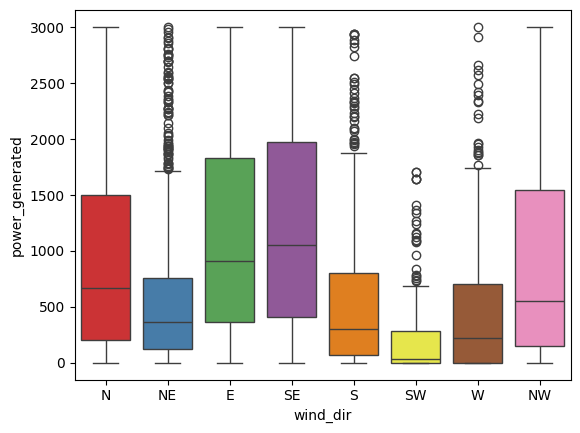

In [ ]:
sns.boxplot(y=data['power_generated'], x=binned_data,palette=('Set1'))
plt.show()

### Insight:
- Wind direction also influences power generated values,SE being the highest

In [ ]:
# quickly add the wind orientation feature
data['wind_orientation'] = binned_data

In [ ]:
data.head()

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season,wind_orientation
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,winter,E
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,winter,E
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,winter,SE
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,winter,SE
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,winter,SE


# Encoding and Modelling

In [ ]:
data.columns

Index(['power_generated', 'wind_speed', 'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season', 'wind_orientation'],
      dtype='object')

In [ ]:
len(data) * 0.3

2628.0

In [ ]:
train_data = data[:-2628]
test_data = data[-2628:]

In [ ]:
train_data.head()

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season,wind_orientation
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,winter,E
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,winter,E
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,winter,SE
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,winter,SE
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,winter,SE


In [ ]:
#performing mean encoding for season orientation
season_mean = train_data.groupby('season')['power_generated'].mean()
data['season_mean_encoded'] = data['season'].map(season_mean)

In [ ]:
#performing mean encoding for wind orientation
wind_mean = train_data.groupby('wind_orientation')['power_generated'].mean()
data['wind_orientation__mean_encoded'] = data['wind_orientation'].map(wind_mean)

In [ ]:
data

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season,wind_orientation,season_mean_encoded,wind_orientation__mean_encoded
Time stamp,,,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,winter,E,1058.753692,1214.650349
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,winter,E,1058.753692,1214.650349
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,winter,SE,1058.753692,1248.372613
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,winter,SE,1058.753692,1248.372613
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,winter,SE,1058.753692,1248.372613
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,1234.70,8.848,129,0.998604,19.663,4,12,52,19,winter,E,1058.753692,1214.650349
2021-12-31 20:00:00,1105.37,8.502,118,1.000090,19.063,4,12,52,20,winter,E,1058.753692,1214.650349
2021-12-31 21:00:00,1405.71,9.224,117,0.998408,18.463,4,12,52,21,winter,E,1058.753692,1214.650349


In [ ]:
data.drop(['season','wind_orientation'],axis=1,inplace=True)

In [ ]:
train_data = data[:-2628]
test_data = data[-2628:]

In [ ]:
train_data

,power_generated,wind_speed,wind_dir,pressure,temperature,quarter,month,week,hour,season_mean_encoded,wind_orientation__mean_encoded
Time stamp,,,,,,,,,,,
2021-01-01 00:00:00,1766.64,9.926,128,1.000480,18.263,1,1,53,0,1058.753692,1214.650349
2021-01-01 01:00:00,1433.83,9.273,135,0.999790,18.363,1,1,53,1,1058.753692,1214.650349
2021-01-01 02:00:00,1167.23,8.660,142,0.999592,18.663,1,1,53,2,1058.753692,1248.372613
2021-01-01 03:00:00,1524.59,9.461,148,0.998309,18.763,1,1,53,3,1058.753692,1248.372613
2021-01-01 04:00:00,1384.28,9.184,150,0.998507,18.963,1,1,53,4,1058.753692,1248.372613
...,...,...,...,...,...,...,...,...,...,...,...
2021-09-13 07:00:00,0.00,1.513,239,0.993169,26.863,3,9,37,7,867.021622,250.053972
2021-09-13 08:00:00,0.00,1.770,276,0.991688,27.563,3,9,37,8,867.021622,489.797900
2021-09-13 09:00:00,0.00,1.977,328,0.992971,29.063,3,9,37,9,867.021622,855.516311


# Modelling
- Linera models:Linear regression
- Support Vector machines:svr
- Ensemble: rf,gbr,catboost, xgboost, light gbm

In [ ]:
# install catboost
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 5.1 MB/s eta 0:00:00


In [ ]:
#Import models
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [ ]:
#selecting X and y train test values
target = 'power_generated'
features = ['wind_speed', 'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season_mean_encoded',
       'wind_orientation__mean_encoded']
X_train,y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

In [ ]:
train_data.dtypes

power_generated                    float64
wind_speed                         float64
wind_dir                             int64
pressure                           float64
temperature                        float64
quarter                              int32
month                                int32
week                                 int64
hour                                 int32
season_mean_encoded                float64
wind_orientation__mean_encoded    category
dtype: object

In [ ]:
#Linear regresion
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)


#Random Forest regression
rf_model = RandomForestRegressor()
rf_model.fit(X_train,y_train)

#Support Vector Machine
svm_model = SVR()
svm_model.fit(X_train,y_train)

#Gradient Boosting regresssion
rgb = GradientBoostingRegressor()
rgb.fit(X_train,y_train)

# #Catboost
cat_features = ['wind_orientation__mean_encoded']
#CatBoost
# Convert the 'wind_orientation__mean_encoded' column to string type
X_train['wind_orientation__mean_encoded'] = X_train['wind_orientation__mean_encoded'].astype(str)

#CatBoost
catboost_model = CatBoostRegressor()
catboost_model.fit(X_train, y_train, cat_features=['wind_orientation__mean_encoded'])



#XGBoost
# XGBoost (requires one-hot encoding for categorical features)
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical feature
encoded_feature = encoder.fit_transform(X_train[[cat_features[0]]]).toarray()

# Get feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out([cat_features[0]])

# Create a DataFrame from the encoded feature
encoded_df = pd.DataFrame(encoded_feature, columns=encoded_feature_names, index=X_train.index)

# Drop the original categorical column from X_train and concatenate the encoded features
X_train_encoded = pd.concat([X_train.drop(cat_features, axis=1), encoded_df], axis=1)

#XGBoost
# XGBoost (requires one-hot encoding for categorical features)
xgboost_model = XGBRegressor()
# Fit XGBoost model on the encoded data
xgboost_model.fit(X_train_encoded, y_train)




from sklearn.preprocessing import OneHotEncoder

# Create a OneHotEncoder object
encoder = OneHotEncoder(handle_unknown='ignore')

# Fit and transform the categorical feature
encoded_feature = encoder.fit_transform(X_train[[cat_features[0]]]).toarray()

# Get feature names for the encoded columns
encoded_feature_names = encoder.get_feature_names_out([cat_features[0]])

# Create a DataFrame from the encoded feature
encoded_df = pd.DataFrame(encoded_feature, columns=encoded_feature_names, index=X_train.index)

# Drop the original categorical column from X_train and concatenate the encoded features
X_train_encoded = pd.concat([X_train.drop(cat_features, axis=1), encoded_df], axis=1)


#LightGBM
lightgbm = LGBMRegressor()
lightgbm.fit(X_train_encoded,y_train)

Learning rate set to 0.054528
0:	learn: 848.5736566	total: 62.3ms	remaining: 1m 2s
1:	learn: 805.4361568	total: 77.3ms	remaining: 38.6s
2:	learn: 763.8226278	total: 94.2ms	remaining: 31.3s
3:	learn: 726.1996476	total: 107ms	remaining: 26.7s
4:	learn: 689.8526200	total: 117ms	remaining: 23.4s
5:	learn: 653.6694906	total: 128ms	remaining: 21.2s
6:	learn: 621.3993779	total: 153ms	remaining: 21.7s
7:	learn: 590.4537197	total: 167ms	remaining: 20.7s
8:	learn: 560.6316081	total: 186ms	remaining: 20.4s
9:	learn: 531.9296966	total: 213ms	remaining: 21.1s
10:	learn: 505.8473991	total: 239ms	remaining: 21.5s
11:	learn: 479.5908422	total: 256ms	remaining: 21.1s
12:	learn: 455.7340679	total: 269ms	remaining: 20.4s
13:	learn: 433.0649466	total: 289ms	remaining: 20.3s
14:	learn: 411.6622608	total: 325ms	remaining: 21.3s
15:	learn: 391.8695704	total: 347ms	remaining: 21.3s
16:	learn: 372.6104539	total: 375ms	remaining: 21.7s
17:	learn: 354.5501269	total: 397ms	remaining: 21.6s
18:	learn: 336.4925648	

LGBMRegressor()

In [ ]:
#Making predictions with models
lr_model_pred = lr_model.predict(X_test)
rf_model_pred = rf_model.predict(X_test)
svm_model_pred = svm_model.predict(X_test)
gbr_model_pred = rgb.predict(X_test)
# Convert the 'wind_orientation__mean_encoded' column in X_test to string type
X_test['wind_orientation__mean_encoded'] = X_test['wind_orientation__mean_encoded'].astype(str)

catboost_model_pred = catboost_model.predict(X_test)


# Apply one-hot encoding to 'wind_orientation__mean_encoded' in X_test
encoded_feature_test = encoder.transform(X_test[[cat_features[0]]]).toarray()
encoded_df_test = pd.DataFrame(encoded_feature_test, columns=encoded_feature_names, index=X_test.index)
X_test_encoded = pd.concat([X_test.drop(cat_features, axis=1), encoded_df_test], axis=1)



xgboost_model_pred = xgboost_model.predict(X_test_encoded)  # Use the encoded X_test



lightgbm_model_pred = lightgbm.predict(X_test_encoded)

In [ ]:
#Evaluation of Model, MSE
lr_mse= mean_squared_error(y_test,lr_model_pred)
rf_mse = mean_squared_error(y_test,rf_model_pred)
gbr_mse = mean_squared_error(y_test,gbr_model_pred)
svm_mse = mean_squared_error(y_test,svm_model_pred)
ct_mse= mean_squared_error(y_test,catboost_model_pred)
xgb_mse = mean_squared_error(y_test,xgboost_model_pred)
lgbm_mse = mean_squared_error(y_test,lightgbm_model_pred)

In [ ]:
print('Linear mode',lr_mse)
print('Random Forest',rf_mse)
print('Support Vector Machine',svm_mse)
print('Gradient Boosting',gbr_mse)
print('Catboost',ct_mse)
print('XGBoost',xgb_mse)
print('LightGBM',lgbm_mse)

Linear mode 80965.27593634969
Random Forest 136.16453910278366
Support Vector Machine 608393.4168488852
Gradient Boosting 70.16740342773697
Catboost 3210.237556882176
XGBoost 61.307644298171304
LightGBM 25.67080977932344


In [ ]:
#After predicting on test set, evaluating using MAE


lr_mae= mean_absolute_error(y_test,lr_model_pred)
rf_mae = mean_absolute_error(y_test,rf_model_pred)
gbr_mae = mean_absolute_error(y_test,gbr_model_pred)
svm_mae = mean_absolute_error(y_test,svm_model_pred)
ct_mae= mean_absolute_error(y_test,catboost_model_pred)
xgb_mae = mean_absolute_error(y_test,xgboost_model_pred)
lgbm_mae = mean_absolute_error(y_test,lightgbm_model_pred)

In [ ]:
print('Linear mode',lr_mae)
print('Random Forest',rf_mae)
print('Support Vector Machine',svm_mae)
print('Gradient Boosting',gbr_mae)
print('Catboost',ct_mae)
print('XGBoost',xgb_mae)
print('LightGBM',lgbm_mae)

Linear mode 228.93177190271575
Random Forest 5.433574510357669
Support Vector Machine 620.6563659850767
Gradient Boosting 5.730821653897454
Catboost 27.979430718340762
XGBoost 4.771655271755524
LightGBM 3.232794527121943


In [ ]:
y_test.mean()

739.5319913727169

In [ ]:
5/739 * 100

0.6765899864682002

rf and gb were  off by roughly 0.6 percent

In [ ]:
from sklearn.metrics import mean_squared_error

# Assuming you have your true values in y_test and predictions in a variable like lr_model_pred
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have your true values in y_test and predictions in a variable like lr_model_pred
mse_lr = mean_squared_error(y_test, lr_model_pred) # Calculate Mean Squared Error
mrse_lr = np.sqrt(mse_lr) # Manually calculate Root Mean Squared Error
print("RMSE for Linear Regression:", mrse_lr)

# Calculate RMSE for other models similarly
mse_rf = mean_squared_error(y_test, rf_model_pred)
mrse_rf = np.sqrt(mse_rf)
print("RMSE for Random Forest:", mrse_rf)


# Calculate RMSE for other SVM
msre_svm = mean_squared_error(y_test, svm_model_pred)
mrse_svm = np.sqrt(msre_svm)
print("RMSE for Support Vector Machine:", mrse_svm)




# Calculate RMSE for Gradient Boosting

mse_gbr = mean_squared_error(y_test, gbr_model_pred)
mrse_gbr = np.sqrt(mse_gbr)
print("RMSE for Gradient Boosting:", mrse_gbr)

# Calculate RMSE for CatBoost
mse_catboost = mean_squared_error(y_test, catboost_model_pred)
mrse_catboost = np.sqrt(mse_catboost)
print("RMSE for CatBoost:", mrse_catboost)


# Calculate MRSE for XGBoost
mse_xgboost = mean_squared_error(y_test, xgboost_model_pred)
mrse_xgboost = np.sqrt(mse_xgboost)
print("RMSE for XGBoost:", mrse_xgboost)



#Calculate RMSE for LGBM
mse_lightgbm = mean_squared_error(y_test, lightgbm_model_pred)
mrse_lightgbm = np.sqrt(mse_lightgbm)
print("RMSE for LightGBM:", mrse_lightgbm)

RMSE for Linear Regression: 284.5439789142439
RMSE for Random Forest: 11.668956213080229
RMSE for Support Vector Machine: 779.9957800199212
RMSE for Gradient Boosting: 8.376598559542947
RMSE for CatBoost: 56.65895831095182
RMSE for XGBoost: 7.8299198142874555
RMSE for LightGBM: 5.06663692988983


# Checking Overfitting

In [ ]:
# Evaluate models on training data
lr_train_pred = lr_model.predict(X_train)
rf_train_pred = rf_model.predict(X_train)
svm_train_pred = svm_model.predict(X_train)
gbr_train_pred = rgb.predict(X_train)
catboost_train_pred = catboost_model.predict(X_train)
xgboost_train_pred = xgboost_model.predict(X_train_encoded)
lightgbm_train_pred = lightgbm.predict(X_train_encoded)

# Calculate MSE and MAE for training data
lr_train_mse = mean_squared_error(y_train, lr_train_pred)
rf_train_mse = mean_squared_error(y_train, rf_train_pred)
gbr_train_mse = mean_squared_error(y_train, gbr_train_pred)
svm_train_mse = mean_squared_error(y_train, svm_train_pred)
ct_train_mse = mean_squared_error(y_train, catboost_train_pred)
xgb_train_mse = mean_squared_error(y_train, xgboost_train_pred)
lgbm_train_mse = mean_squared_error(y_train, lightgbm_train_pred)

lr_train_mae = mean_absolute_error(y_train, lr_train_pred)
rf_train_mae = mean_absolute_error(y_train, rf_train_pred)
gbr_train_mae = mean_absolute_error(y_train, gbr_train_pred)
svm_train_mae = mean_absolute_error(y_train, svm_train_pred)
ct_train_mae = mean_absolute_error(y_train, catboost_train_pred)
xgb_train_mae = mean_absolute_error(y_train, xgboost_train_pred)
lgbm_train_mae = mean_absolute_error(y_train, lightgbm_train_pred)

# Print comparison of train and test performance
print("Model\t\tTrain MSE\tTest MSE\tTrain MAE\tTest MAE")
print("-" * 100)
print(f"Linear Reg\t{lr_train_mse:.4f}\t\t{lr_mse:.4f}\t\t{lr_train_mae:.4f}\t\t{lr_mae:.4f}")
print(f"Random Forest\t{rf_train_mse:.4f}\t\t{rf_mse:.4f}\t\t{rf_train_mae:.4f}\t\t{rf_mae:.4f}")
print(f"SVM\t\t{svm_train_mse:.4f}\t\t{svm_mse:.4f}\t\t{svm_train_mae:.4f}\t\t{svm_mae:.4f}")
print(f"Gradient Boost\t{gbr_train_mse:.4f}\t\t{gbr_mse:.4f}\t\t{gbr_train_mae:.4f}\t\t{gbr_mae:.4f}")
print(f"CatBoost\t{ct_train_mse:.4f}\t\t{ct_mse:.4f}\t\t{ct_train_mae:.4f}\t\t{ct_mae:.4f}")
print(f"XGBoost\t\t{xgb_train_mse:.4f}\t\t{xgb_mse:.4f}\t\t{xgb_train_mae:.4f}\t\t{xgb_mae:.4f}")
print(f"LightGBM\t{lgbm_train_mse:.4f}\t\t{lgbm_mse:.4f}\t\t{lgbm_train_mae:.4f}\t\t{lgbm_mae:.4f}")

Model		Train MSE	Test MSE	Train MAE	Test MAE
----------------------------------------------------------------------------------------------------
Linear Reg	61958.7504		80965.2759		207.3623		228.9318
Random Forest	5.5635		142.0955		1.2654		5.5386
SVM		808272.1048		608393.4168		714.7188		620.6564
Gradient Boost	45.0662		70.1351		5.0560		5.7299
CatBoost	27.5393		3210.2376		4.0204		27.9794
XGBoost		8.5162		61.3076		2.1592		4.7717
LightGBM	13.8448		25.6708		2.7862		3.2328


In [ ]:
# Calculate RMSE on training set for each model
train_pred_lr = lr_model.predict(X_train)
train_rmse_lr = np.sqrt(mean_squared_error(y_train, train_pred_lr))

train_pred_rf = rf_model.predict(X_train)
train_rmse_rf = np.sqrt(mean_squared_error(y_train, train_pred_rf))

train_pred_svm = svm_model.predict(X_train)
train_rmse_svm = np.sqrt(mean_squared_error(y_train, train_pred_svm))

train_pred_gbr = rgb.predict(X_train)
train_rmse_gbr = np.sqrt(mean_squared_error(y_train, train_pred_gbr))

# Assuming X_train also has 'wind_orientation__mean_encoded' as string type for CatBoost
train_pred_catboost = catboost_model.predict(X_train)
train_rmse_catboost = np.sqrt(mean_squared_error(y_train, train_pred_catboost))

# Assuming X_train_encoded is available for XGBoost and LightGBM
train_pred_xgboost = xgboost_model.predict(X_train_encoded)
train_rmse_xgboost = np.sqrt(mean_squared_error(y_train, train_pred_xgboost))

train_pred_lightgbm = lightgbm.predict(X_train_encoded)
train_rmse_lightgbm = np.sqrt(mean_squared_error(y_train, train_pred_lightgbm))

# Print RMSE values for train and test sets
print("Model\tTrain RMSE\tTest RMSE")
print(f"Linear Regression\t{train_rmse_lr:.4f}\t{rmse_lr:.4f}")
print(f"Random Forest\t{train_rmse_rf:.4f}\t{mrse_rf:.4f}")
print(f"SVM\t{train_rmse_svm:.4f}\t{mrse_svm:.4f}")
print(f"Gradient Boosting\t{train_rmse_gbr:.4f}\t{mrse_gbr:.4f}")
print(f"CatBoost\t{train_rmse_catboost:.4f}\t{mrse_catboost:.4f}")
print(f"XGBoost\t{train_rmse_xgboost:.4f}\t{mrse_xgboost:.4f}")
print(f"LightGBM\t{train_rmse_lightgbm:.4f}\t{mrse_lightgbm:.4f}")

Model	Train RMSE	Test RMSE


NameError: name 'rmse_lr' is not defined

#Hyperparameter Tunning And Beryesian Optimization

### Hyparameter tunning is a crucial step  in optimizing machanie learning models.HyperOpt is a python  library that provides a convenient way to perform  hyperparameter tunning using beryesian optimization techniques.Beryesian optimozation is a probabilistic model-based optimization metthod that effectively search the hyperparameter space to find the optimal set  of hyperparameters for agiven machine learning model
- Space/set of hyperparameters ==>optimal values for each hyperparameter

In [ ]:
len(X_train)

6132

In [ ]:
len(X_train)*0.2

1226.4

In [ ]:


X_val = X_train[-1200:]   # Taking the last 1200 samples for validation
y_val = y_train[-1200:]   # Taking the last 1200 target values for validation


X_train = X_train[:-1200] # Keeping the remaining samples for training
y_train = y_train[:-1200]  # Keeping the remaining target values for training




In [ ]:
len(X_val)

1200

In [ ]:
len(X_train)

4932

In [ ]:
!pip install --upgrade hyperopt

In [ ]:
import numpy as np
from hyperopt import hp, fmin, tpe, Trials
from hyperopt import STATUS_OK  # Import directly from hyperopt

In [ ]:
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials

In [ ]:
import numpy as np
from hyperopt import hp, fmin, tpe, hp,STATUS_OK,Trials


#Create a space
space = {
    "n_estimators":hp.quniform('n_estimators',100,300,1),
    "max_depth":hp.quniform('max_depth',5,20,1),
    "min_samples_split":hp.quniform('min_samples_split',2,10,1),
    "max_features":hp.choice('max_features',['sqrt','log2',None])


}

#objective function ==> sample from this space, create a random model, evaluate the model, return the loss function/mse
def objective(params):
  n_estimators = int(params['n_estimators'])
  max_depth = int(params['max_depth'])
  min_samples_split = int(params['min_samples_split'])
  max_features = params['max_features']

  rf_model = RandomForestRegressor(
      n_estimators=n_estimators,
      max_depth=max_depth,
      min_samples_split=min_samples_split,
      max_features=max_features,
      random_state= 42
      )
  rf_model.fit(X_train,y_train)
  predictions= rf_model.predict(X_val)

  mse = mean_squared_error(y_val,predictions)
  return {'loss':mse,'status':STATUS_OK}


#minimized function ,minimized the objective function:fmin, this information guide the sampling th space
trials = Trials()
best= fmin(
      fn=objective,
      space=space,
      algo=tpe.suggest,
      max_evals=100,
      trials=trials,
      verbose=1
  )
print("Best HyperParameter:", best)
# repeat

100%|██████████| 100/100 [08:06<00:00,  4.86s/trial, best loss: 27.757034227594115]
Best HyperParameter: {'max_depth': 15.0, 'max_features': 2, 'min_samples_split': 2.0, 'n_estimators': 242.0}


In [ ]:
best_rf_hyperparameters =  {'max_depth': 15.0, 'max_features': 2, 'min_samples_split': 2.0, 'n_estimators': 240.0}

In [ ]:
import numpy as np
from hyperopt import hp, fmin, tpe, hp,STATUS_OK,Trials


#Create a space
space = {
    "n_estimators":hp.quniform('n_estimators',100,300,1),
    "max_depth":hp.quniform('max_depth',5,20,1),
    #"min_samples_split":hp.quniform('min_samples_split',2,10,1),
    "learning_rate":hp.loguniform('learning_rate',-5, 0),
    "subsample":hp.uniform('subsample',0.1 ,1)


}

#objective function ==> sample from this space, create a random model, evaluate the model, return the loss function/mse
def objective(params):
  n_estimators = int(params['n_estimators'])
  max_depth = int(params['max_depth'])
  #min_samples_split = int(params['min_samples_split'])
  learning_rate = params['learning_rate']
  subsample = params['subsample']
  #max_features = params['max_features']

  gb_model = GradientBoostingRegressor(
      n_estimators=n_estimators,
      max_depth=max_depth,
      learning_rate = params['learning_rate'],
      subsample = params['subsample'],
      random_state= 42
      )
  gb_model.fit(X_train,y_train)
  predictions= gb_model.predict(X_val)

  mse = mean_squared_error(y_val,predictions)
  return {'loss':mse,'status':STATUS_OK}


#minimized function ,minimized the objective function:fmin, this information guide the sampling th space
trials = Trials()
best= fmin(
      fn=objective,
      space=space,
      algo=tpe.suggest,
      max_evals=100,
      trials=trials,
      verbose=1
  )
print("Best HyperParameter:", best)
# repeat

100%|██████████| 100/100 [05:19<00:00,  3.20s/trial, best loss: 6.133358129687015]
Best HyperParameter: {'learning_rate': 0.034455383455193764, 'max_depth': 8.0, 'n_estimators': 299.0, 'subsample': 0.1953662005803351}


In [ ]:
best_gb_hyperparameters = {'learning_rate': 0.035249499261950146, 'max_depth': 18.0, 'n_estimators': 280.0, 'subsample': 0.16468025093211147}

 In the context of Hyperopt, the `algo=tpe.suggest` part specifies that you want to use the Tree-structured Parzen Estimator (TPE) algorithm for the optimization process.

# **What is TPE?**

# TPE is a Bayesian optimization algorithm that intelligently explores the hyperparameter space to find the optimal set of hyperparameters for your machine learning model. It does this by building a probabilistic model of the objective function (in this case, the mean squared error) based on the results of previous evaluations.

# **How TPE Works**

# 1. **Initialization:** TPE starts by randomly sampling a set of hyperparameter configurations from the defined search space. These configurations are evaluated, and the corresponding loss values (MSE in this case) are recorded.

# 2. **Model Building:** TPE constructs two probabilistic models based on the observed data:
#    - **l(x):** This model estimates the probability of a hyperparameter configuration 'x' resulting in a good loss value (lower is better).
#    - **g(x):** This model estimates the probability of a hyperparameter configuration 'x' resulting in a bad loss value.

# 3. **Next Configuration Selection:** To select the next hyperparameter configuration to evaluate, TPE calculates the Expected Improvement (EI) for each candidate configuration. EI is a measure of how much improvement we expect to see in the loss function if we evaluate a particular configuration. TPE chooses the configuration with the highest EI.

# 4. **Iteration:** Steps 2 and 3 are repeated iteratively. TPE updates its probabilistic models as more evaluations are performed, leading to a more refined understanding of the hyperparameter space and better selection of promising configurations.

# **Advantages of TPE**

# - **Efficiency:** TPE is often more efficient than random search or grid search, especially when the hyperparameter space is large or complex.
# - **Flexibility:** TPE can handle both continuous and discrete hyperparameters.
# - **Robustness:** TPE is relatively robust to noisy evaluations and can handle non-convex objective functions.

# **In Summary**

# By using `algo=tpe.suggest`, you are leveraging the power of Bayesian optimization with the TPE algorithm to efficiently and effectively find the best hyperparameters for your Random Forest model, leading to improved performance on the validation set.


In [ ]:
#Create a space
#objective function ==> sample from this space, create a random model, evaluate the model, return the loss function/mse
#minimized function ,minimized the objective function:fmin, this information guide the sampling th space
# repeat

In [ ]:
train_data = data[:-2628]
test_data = data[-2628:]

In [ ]:
#selecting X and y train test values
target = 'power_generated'
features = ['wind_speed', 'wind_dir', 'pressure', 'temperature',
       'quarter', 'month', 'week', 'hour', 'season_mean_encoded',
       'wind_orientation__mean_encoded']
X_train,y_train = train_data[features], train_data[target]
X_test, y_test = test_data[features], test_data[target]

In [ ]:
best_rf_hyperparameters =  {'max_depth': 15.0, 'max_features': 2, 'min_samples_split': 2.0, 'n_estimators': 240.0}
rf_model = RandomForestRegressor(
    n_estimators = 241,
    max_depth=15,
    max_features=2,
    min_samples_split = 2,
    random_state= 42
)
rf_model.fit(X_train,y_train)
rf_predictions = rf_model.predict(X_test)

rf_mse = mean_squared_error(y_test,rf_predictions)
rf_mae = mean_absolute_error(y_test,rf_predictions)
print('MSE Random Forest',rf_mse)
print('MAE Random Forest',rf_mae)


MSE Random Forest 73452.0203733416
MAE Random Forest 187.5849427888616


In [ ]:
best_gb_hyperparameters = {'learning_rate': 0.035249499261950146, 'max_depth': 18.0, 'n_estimators': 280.0, 'subsample': 0.16468025093211147}
gbr_model = GradientBoostingRegressor(
    n_estimators = 280,
    max_depth=18,
    subsample=0.16468025093211147,
    learning_rate = 0.035249499261950146,
    random_state= 42
)
gbr_model.fit(X_train,y_train)
gbr_predictions = gbr_model.predict(X_test)

gbr_mse = mean_squared_error(y_test,gbr_predictions)
gbr_mae = mean_absolute_error(y_test,gbr_predictions)
print('MSE Gradient Boosting Regressor',gbr_mse)
print('MAE Gradient Boostng Regressor',gbr_mae)

MSE Gradient Boosting Regressor 61.44411702257839
MAE Gradient Boostng Regressor 4.167430419479515


#Inference Script Creation

In [ ]:
pd

<module 'pandas' from '/usr/local/lib/python3.10/dist-packages/pandas/__init__.py'>